In [1]:
import pandas as pd
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Preparation

In [2]:
import zipfile
import os

def unzip_and_rename(zip_file_path, extract_dir, new_name):
    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    
    # Get the list of files extracted
    extracted_files = os.listdir(extract_dir)
    
    if len(extracted_files) == 1:
        old_file_path = os.path.join(extract_dir, extracted_files[0])
        new_file_path = os.path.join(extract_dir, new_name)
        os.rename(old_file_path, new_file_path)
    else:
        print("Error: More than one file extracted or no files extracted.")

# Example usage:

zip_file_path = 'netflix_data.zip' 
new_name = 'Netflix_shows_movies.csv'
extract_dir = 'extracted'


unzip_and_rename(zip_file_path, extract_dir, new_name)


Error: More than one file extracted or no files extracted.


In [3]:
df = pd.read_csv('extracted/Netflix_shows_movies.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Data Cleaning

###### Checking for number of missing values

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.to_csv('cleaned_data.csv')

### Data Exploration

###### describing the data

In [9]:
df.describe()

,show_id,release_year
count,3.774000e+03,3774.000000
mean,7.510908e+07,2012.087440
std,1.341114e+07,9.566944
min,2.477470e+05,1942.000000
25%,7.027581e+07,2011.000000
50%,8.014732e+07,2016.000000
75%,8.024067e+07,2017.000000
max,8.123573e+07,2020.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


In [11]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [12]:
df['type'].nunique()

2

In [13]:
df['title'].unique()

array(['Norm of the North: King Sized Adventure', '#realityhigh',
       'Automata', ..., 'Sacred Games', 'Men on a Mission',
       'Leyla and Mecnun'], dtype=object)

In [14]:
df['title'].nunique()

3752

In [15]:
df['director'].unique()

array(['Richard Finn, Tim Maltby', 'Fernando Lebrija', 'Gabe Ibáñez', ...,
       'Vikramaditya Motwane, Anurag Kashyap', 'Jung-ah Im', 'Onur Ünlü'],
      dtype=object)

In [16]:
df['director'].nunique()

2920

In [17]:
df['cast'].unique()

array(['Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson',
       'Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis',
       'Antonio Banderas, Dylan McDermott, Melanie Griffith, Birgitte Hjort Sørensen, Robert Forster, Christa Campbell, Tim McInnerny, Andy Nyman, David Ryall',
       ...,
       'Saif Ali Khan, Nawazuddin Siddiqui, Radhika Apte, Neeraj Kabi, Jitendra Joshi',
       'Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Young-chul Kim, Jang-hoon Seo, Hee-chul Kim, Kyung-hoon Min',
       'Ali Atay, Melis Birkan, Serkan Keskin, Ahmet Mümtaz Taylan, Cengiz Bozkurt, Osman Sonant, Köksal Engür, Ege Tanman, İştar Gökseven'],
      dtype=object)

In [18]:
df['cast'].nunique()

3667

In [19]:
df['country'].unique()

array(['United States, India, South Korea, China', 'United States',
       'Bulgaria, United States, Spain, Canada', 'Chile',
       'United States, United Kingdom, Denmark, Sweden',
       'Netherlands, Belgium, United Kingdom, United States',
       'France, Belgium', 'Thailand', 'China, Canada, United States',
       'Belgium, United Kingdom, United States', 'Belgium, France',
       'India', 'United Kingdom', 'United States, Canada', 'Pakistan',
       'Canada', 'United Kingdom, France',
       'United States, United Kingdom', 'South Korea',
       'United Kingdom, United States', 'Turkey, United States', 'Brazil',
       'Denmark, France, Italy, Belgium, Netherlands', 'Indonesia',
       'China', 'Turkey', 'Hong Kong', 'France, Morocco',
       'Hong Kong, China', 'Vietnam', 'France, Canada',
       'Spain, Argentina', 'Nigeria', 'France', 'Spain',
       'United States, Greece, United Kingdom',
       'Norway, United Kingdom, France, Ireland',
       'France, Switzerland, Spain, 

In [20]:
df['country'].nunique()

433

In [21]:
df['date_added'].unique()

array(['September 9, 2019', 'September 8, 2017', 'September 8, 2015', ...,
       ' August 15, 2019', ' April 9, 2019', ' April 15, 2017'],
      dtype=object)

In [22]:
df['date_added'].nunique()

1014

In [23]:
df['release_year'].unique()

array([2019, 2017, 2014, 2015, 2011, 2018, 2016, 2012, 2009, 2004, 2010,
       2013, 2000, 1982, 2006, 2005, 2002, 1997, 2008, 2007, 2003, 1981,
       1991, 1994, 1988, 1983, 1973, 1974, 1989, 1986, 1984, 1978, 1979,
       1960, 1959, 2001, 1995, 1992, 1990, 1975, 1985, 1980, 1970, 1998,
       1996, 1967, 1987, 1968, 1999, 1993, 1958, 1965, 1956, 1976, 1962,
       1955, 1972, 1977, 1945, 1946, 1942, 1947, 1944, 1969, 1954, 1966,
       1971, 2020, 1964], dtype=int64)

In [24]:
df['release_year'].nunique()

69

In [25]:
year_counts = df['release_year'].value_counts()
year_counts

release_year
2017    585
2018    537
2016    514
2019    326
2015    324
       ... 
1945      1
1955      1
1956      1
1970      1
1964      1
Name: count, Length: 69, dtype: int64

In [26]:
df['rating'].unique()

array(['TV-PG', 'TV-14', 'R', 'TV-MA', 'NR', 'PG-13', 'PG', 'TV-Y7', 'G',
       'TV-G', 'UR', 'TV-Y7-FV', 'TV-Y', 'NC-17'], dtype=object)

In [27]:
df['rating'].nunique()

14

In [28]:
ratings_counts = df['rating'].value_counts()
ratings_counts

rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: count, dtype: int64

In [29]:
df['duration'].unique()

array(['90 min', '99 min', '110 min', '60 min', '95 min', '135 min',
       '98 min', '96 min', '113 min', '80 min', '112 min', '106 min',
       '102 min', '114 min', '125 min', '133 min', '86 min', '146 min',
       '79 min', '122 min', '126 min', '116 min', '130 min', '70 min',
       '128 min', '88 min', '108 min', '93 min', '64 min', '107 min',
       '111 min', '103 min', '72 min', '89 min', '127 min', '163 min',
       '104 min', '75 min', '82 min', '94 min', '97 min', '91 min',
       '58 min', '152 min', '87 min', '78 min', '121 min', '101 min',
       '119 min', '83 min', '182 min', '124 min', '1 Season', '139 min',
       '171 min', '84 min', '62 min', '76 min', '92 min', '153 min',
       '141 min', '117 min', '100 min', '137 min', '132 min', '157 min',
       '109 min', '65 min', '105 min', '71 min', '123 min', '67 min',
       '140 min', '138 min', '149 min', '47 min', '148 min', '151 min',
       '155 min', '162 min', '85 min', '160 min', '29 min', '57 min',
       '73 m

In [30]:
df['duration'].nunique()

184

In [31]:
duration_counts = df['duration'].value_counts()
duration_counts

duration
90 min     93
95 min     88
92 min     88
94 min     88
91 min     85
           ..
43 min      1
38 min      1
41 min      1
224 min     1
209 min     1
Name: count, Length: 184, dtype: int64

In [32]:
df['listed_in'].unique()

array(['Children & Family Movies, Comedies', 'Comedies',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Stand-Up Comedy', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Horror Movies, Thrillers', 'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, Independent Movies, International Movies',
       'Comedies, International Movies',
       'Action & Adventure, Comedies, Independent Movies',
       'Comedies, Dramas, International Movies', 'Documentaries',
       'Comedies, International Movies, Romantic Movies',
 

In [33]:
df['listed_in'].nunique()

296

### Data Visualization

###### rating distribution

In [34]:
df['rating'].unique()

array(['TV-PG', 'TV-14', 'R', 'TV-MA', 'NR', 'PG-13', 'PG', 'TV-Y7', 'G',
       'TV-G', 'UR', 'TV-Y7-FV', 'TV-Y', 'NC-17'], dtype=object)

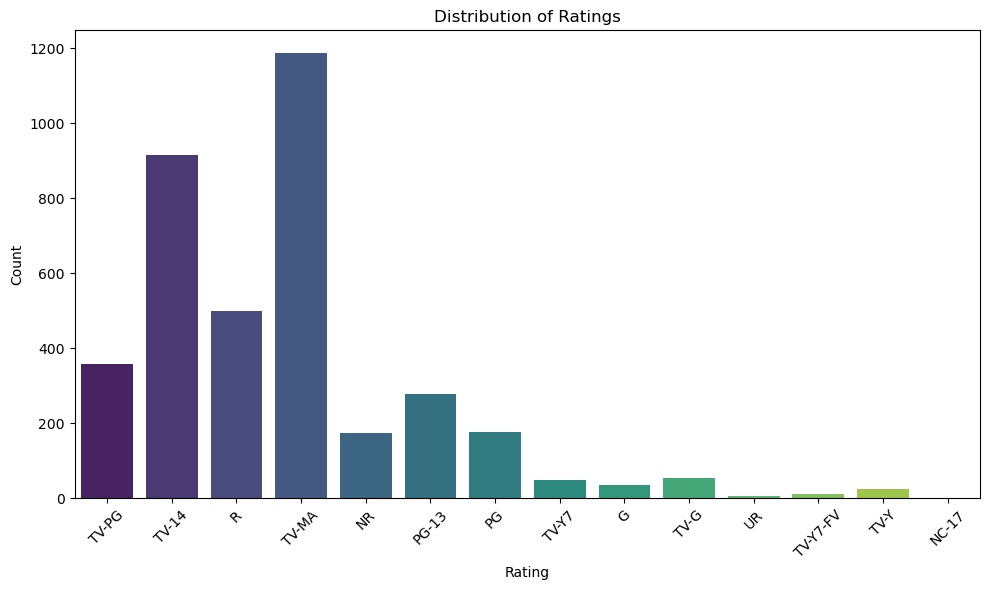

In [35]:
rating_categories = ['TV-PG', 'TV-14', 'R', 'TV-MA', 'NR', 'PG-13', 'PG', 'TV-Y7', 'G', 'TV-G', 'UR', 'TV-Y7-FV', 'TV-Y', 'NC-17']

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=rating_categories, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


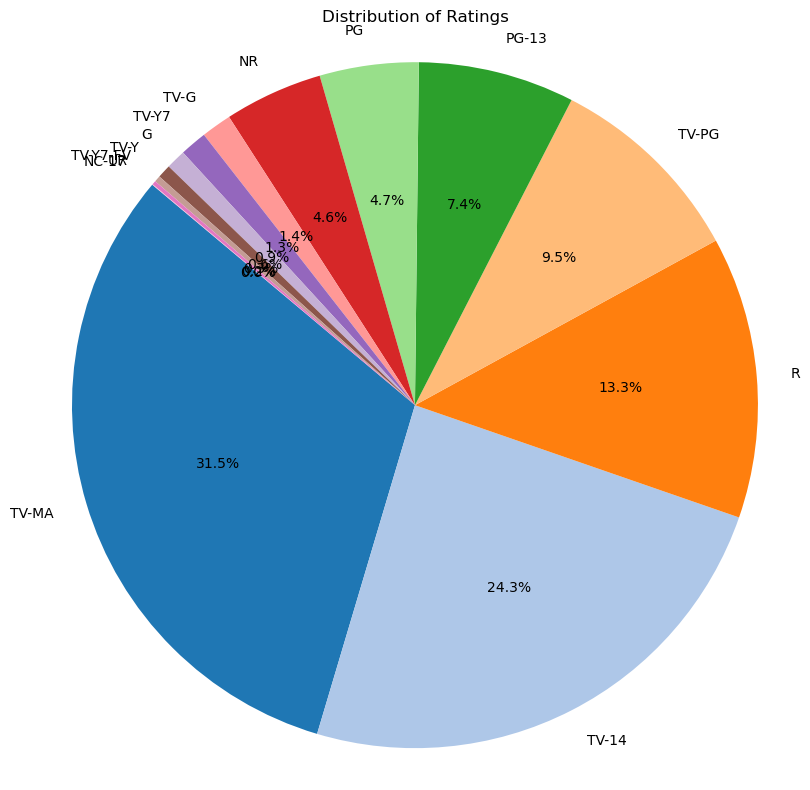

In [36]:
# Plot the distribution of ratings using a pie chart
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


###### to get the genre counts, we first extract the genres from the listed_in column and count them

In [37]:
genres = df['listed_in'].str.split(', ', expand=True).stack()

# Count occurrences of each genre
genre_counts = genres.value_counts()

In [38]:
genre_counts

International Movies            1722
Dramas                          1572
Comedies                        1058
Action & Adventure               583
Independent Movies               545
Thrillers                        382
Romantic Movies                  363
Children & Family Movies         322
Documentaries                    306
Horror Movies                    254
Stand-Up Comedy                  241
Music & Musicals                 193
Sci-Fi & Fantasy                 185
Sports Movies                    116
Classic Movies                    76
Cult Movies                       54
LGBTQ Movies                      51
International TV Shows            50
Anime Features                    43
Faith & Spirituality              41
TV Dramas                         32
Crime TV Shows                    23
Movies                            20
British TV Shows                  17
TV Comedies                       17
Romantic TV Shows                 12
TV Action & Adventure             11
K

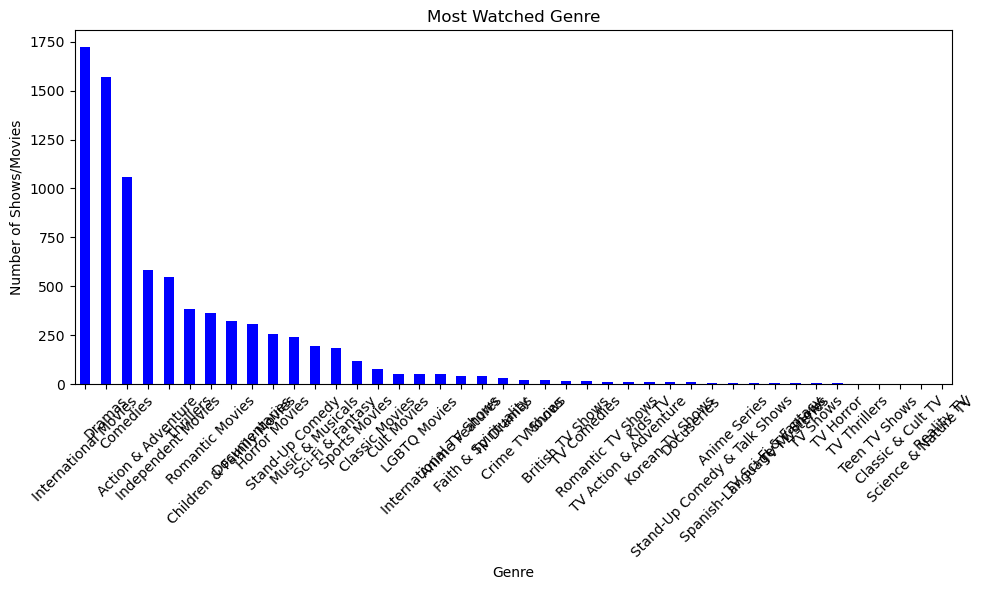

In [39]:
genres = df['listed_in'].str.split(', ', expand=True).stack()

genre_counts = genres.value_counts()

# Plot the most watched genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='blue')
plt.title('Most Watched Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Shows/Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


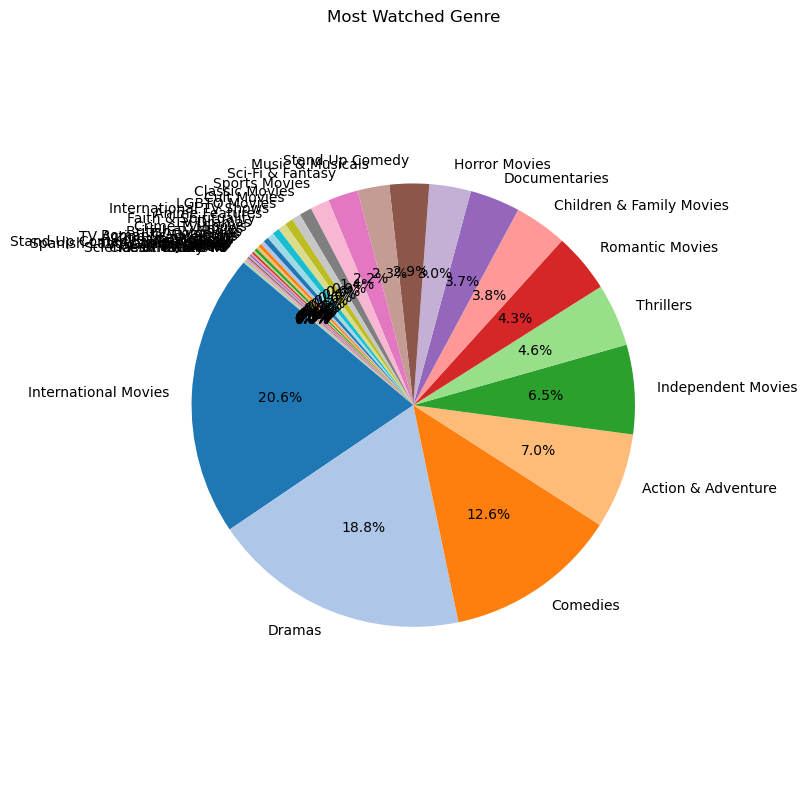

In [40]:
# Plot the most watched genre using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Most Watched Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()